In [16]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [17]:
originalImage = cv2.imread("../photos/Characters Test Pattern 688x688.tif", cv2.IMREAD_GRAYSCALE)
#originalImage = cv2.resize(originalImage, (512, 512))

In [18]:
# Generate Gaussian noise
noise = np.random.normal(7, 10, originalImage.shape).astype(np.uint8)
noisyImage = cv2.add(originalImage, noise)

In [19]:
# Perform fft on the noisy image
fftOriginalImage = np.fft.fftshift(np.fft.fft2(originalImage))
fftNoisyImage = np.fft.fftshift(np.fft.fft2(noisyImage))
magnitudeSpectrum = np.log(np.abs(fftOriginalImage) + 1)

In [20]:
def plotImage(row, col, index, image, title):
    plt.subplot(row, col, index)
    # Display the magnitude or real part of the complex image
    if np.iscomplexobj(image):
        plt.imshow(np.abs(image), cmap='gray')  # Display magnitude
    else:
        plt.imshow(image, cmap='gray')  # Display real part
    plt.title(title)

In [21]:
def applyIdealHighPassFilter(image, cutOffFrequency):
    height, width = image.shape
    idealFilter = np.zeros(image.shape, dtype=np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height/2)**2 + (v - width/2)**2)
            if (D > cutOffFrequency):
                idealFilter[u, v] = 1

    filteredImage = image * idealFilter
    return filteredImage

In [ ]:
def applyGaussianHighPassFilter(image, cutOffFrequency):
    height, width = image.shape
    gaussianFilter = np.zeros(image.shape, dtype=np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height/2)**2 + (v - width/2)**2)
            gaussianFilter[u, v] = 1 - np.exp(-(D**2) / (2 * (cutOffFrequency**2)))

    filteredImage = image * gaussianFilter
    return filteredImage

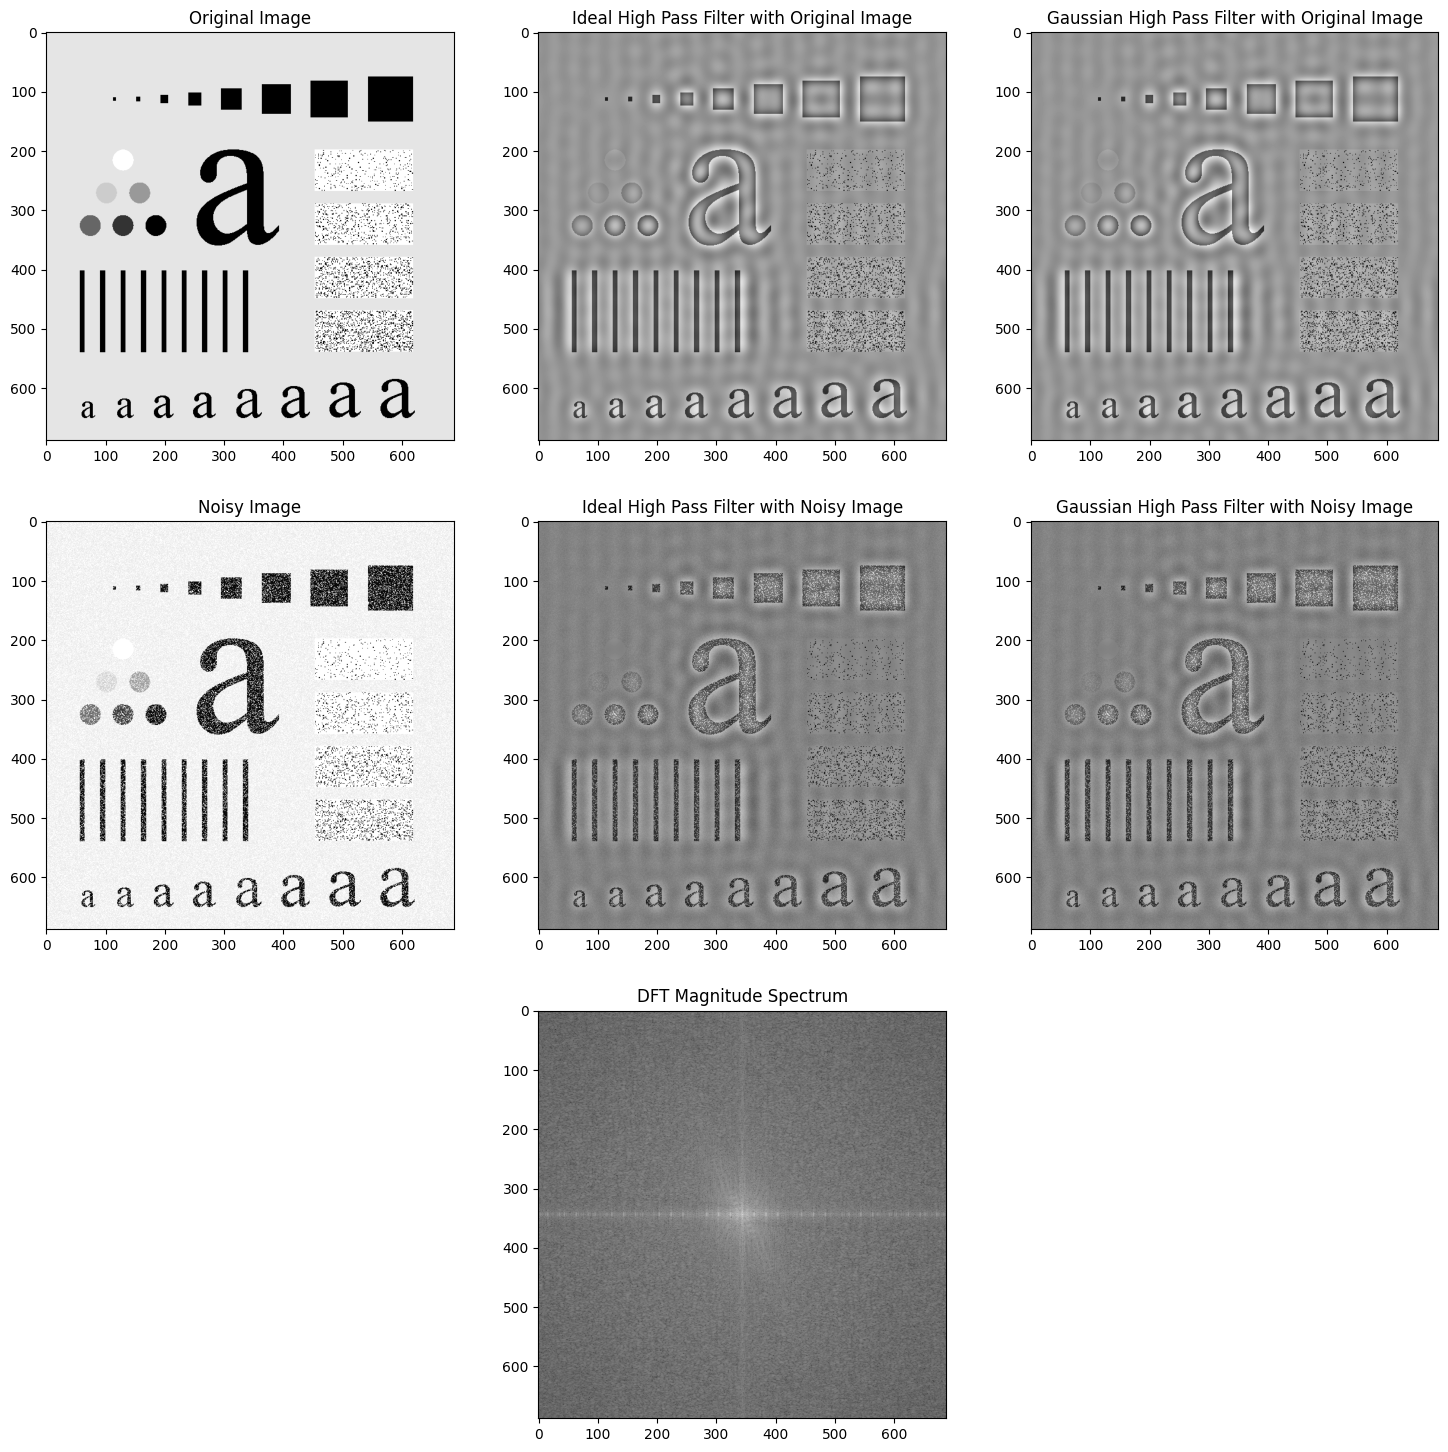

In [27]:
cutOffFrequency = 20
plt.figure(figsize=(18, 18))

# For Original Image
plotImage(3, 3, 1, originalImage, "Original Image")

idealFilteredImage = applyIdealHighPassFilter(fftOriginalImage, cutOffFrequency)
idealFilteredImage = np.fft.ifft2(np.fft.ifftshift(idealFilteredImage)).real
plotImage(3, 3, 2, idealFilteredImage, "Ideal High Pass Filter with Original Image")

gaussianFilteredImage = applyIdealHighPassFilter(fftOriginalImage, cutOffFrequency)
gaussianFilteredImage = np.fft.ifft2(np.fft.ifftshift(gaussianFilteredImage)).real
plotImage(3, 3, 3, idealFilteredImage, "Gaussian High Pass Filter with Original Image")

# For Noisy Image
plotImage(3, 3, 4, noisyImage, "Noisy Image")

idealFilteredImage = applyIdealHighPassFilter(fftNoisyImage, cutOffFrequency)
idealFilteredImage = np.fft.ifft2(np.fft.ifftshift(idealFilteredImage)).real
plotImage(3, 3, 5, idealFilteredImage, "Ideal High Pass Filter with Noisy Image")

gaussianFilteredImage = applyIdealHighPassFilter(fftNoisyImage, cutOffFrequency)
gaussianFilteredImage = np.fft.ifft2(np.fft.ifftshift(gaussianFilteredImage)).real
plotImage(3, 3, 6, idealFilteredImage, "Gaussian High Pass Filter with Noisy Image")

# DFT Magnitude Spectrum for Original Image
plotImage(3, 3, 8, magnitudeSpectrum, "DFT Magnitude Spectrum")

Gaussian High-Pass Filters and Ideal High-Pass Filters are used in image and signal processing for specific applications. Here are reasons why each type of high-pass filter might be used:

### Gaussian High-Pass Filter:

1. **Smooth Roll-off:**
   - Gaussian High-Pass Filters have a smooth and gradual roll-off in the frequency domain. This property helps avoid abrupt transitions, reducing the likelihood of ringing artifacts in the spatial domain.

2. **Variable Sharpening:**
   - The standard deviation parameter in a Gaussian filter allows for variable sharpening. By adjusting the standard deviation, one can control the extent of high-frequency emphasis, providing flexibility in image enhancement.

3. **Noise Reduction:**
   - Gaussian filters inherently incorporate a degree of smoothing, which can act as a form of noise reduction. While they are high-pass filters, they can simultaneously suppress high-frequency noise.

4. **Edge Enhancement:**
   - Gaussian high-pass filtering emphasizes edges and details in an image. This can be beneficial for tasks such as edge detection or feature extraction.

5. **Realistic Implementation:**
   - Gaussian filters are more realistic and practical than ideal filters. Their smooth characteristics make them suitable for a wide range of applications where a gradual transition between frequencies is desirable.

### Ideal High-Pass Filter:

1. **Conceptual Simplicity:**
   - Similar to the Ideal Low-Pass Filter, the Ideal High-Pass Filter is conceptually simple. It serves as a theoretical model for understanding high-pass filtering concepts and behaviors.

2. **Theoretical Analysis:**
   - In theoretical discussions and analyses, the Ideal High-Pass Filter is used to explain the concept of attenuating low-frequency components while allowing high-frequency components to pass.

3. **Educational Purposes:**
   - In educational settings, the Ideal High-Pass Filter is introduced to help students understand fundamental high-pass filtering principles and their impact on signal or image content.

4. **Comparison Benchmark:**
   - Similar to the ideal low-pass case, the Ideal High-Pass Filter can be used as a benchmark for comparing real-world high-pass filters. It helps highlight challenges and compromises in practical high-pass filter design.

In summary, Gaussian High-Pass Filters are preferred for their smoothness, variable sharpening, and practical implementation, especially in applications where noise reduction and edge enhancement are crucial. Ideal High-Pass Filters are used more for theoretical analysis, education, and as a conceptual baseline for understanding high-pass filtering.